In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\varun\OneDrive\Desktop\Oaisis INternship\Test.csv")

In [4]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
categorical_cols = ['Ever_Married', 'Graduated', 'Profession', 'Var_1']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
x=df['Work_Experience'].mean().round(2)
df['Work_Experience']=df['Work_Experience'].fillna(x)

In [9]:
df['Family_Size']=df['Family_Size'].fillna(df['Family_Size'].median())
df['Family_Size']=df['Family_Size'].astype('int')

In [10]:
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

In [11]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2627.000000,2627.000000
mean,463433.918919,43.649791,2.552322,2.789874
std,2618.245698,16.967015,3.165346,1.527360
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,3.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [12]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.00,Low,1,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.00,Average,4,Cat_6
2,458996,Female,Yes,69,No,Artist,0.00,Low,1,Cat_6
3,459000,Male,Yes,59,No,Executive,11.00,High,2,Cat_6
4,459001,Female,No,19,No,Marketing,2.55,Low,4,Cat_6


In [15]:
df['Gender'].value_counts()

Gender
Male      1424
Female    1203
Name: count, dtype: int64

In [27]:
# Define age segments
bins = [18, 35, 50, 65, 100]
labels = ['18-35', '35-50', '50-65', '65+']
df['Age_Segment'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Display the distribution of age segments
age_segment_distribution = df['Age_Segment'].value_counts()
age_segment_distribution


Age_Segment
35-50    940
18-35    868
50-65    457
65+      362
Name: count, dtype: int64

In [18]:
# Display the distribution of spending score segments
spending_score_distribution = df['Spending_Score'].value_counts()
spending_score_distribution


Spending_Score
Low        1616
Average     625
High        386
Name: count, dtype: int64

In [40]:
# Calculate average family size per age segment
age_segment_insights = df.groupby('Age_Segment')['Family_Size'].mean()#.round()
age_segment_insights


Age_Segment
18-35    3.394009
35-50    2.535106
50-65    2.770241
65+      2.027624
Name: Family_Size, dtype: float64

In [24]:
# Calculate average age per spending score segment
spending_score_insights = df.groupby('Spending_Score')['Age'].mean()
spending_score_insights


Spending_Score
Average    47.307200
High       59.489637
Low        38.451733
Name: Age, dtype: float64

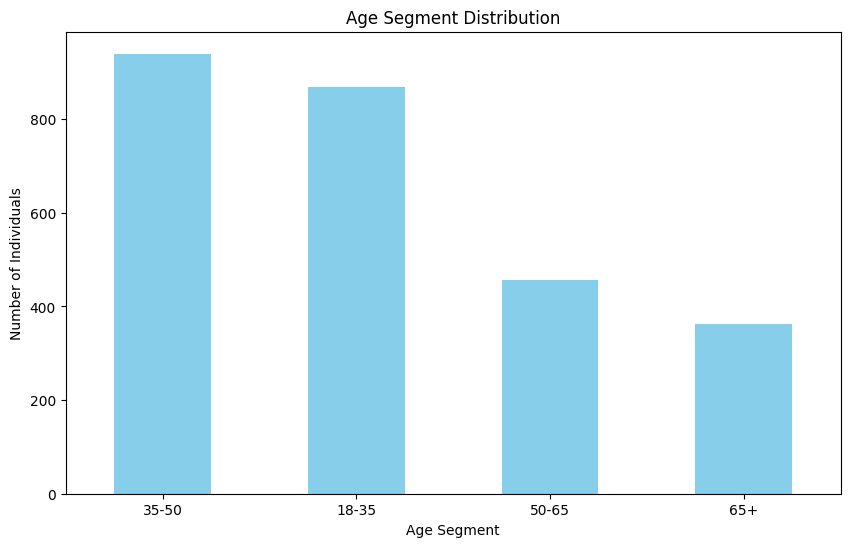

In [28]:
# Plot Age Segment Distribution
plt.figure(figsize=(10, 6))
age_segment_distribution.plot(kind='bar', color='skyblue')
plt.title('Age Segment Distribution')
plt.xlabel('Age Segment')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.show()


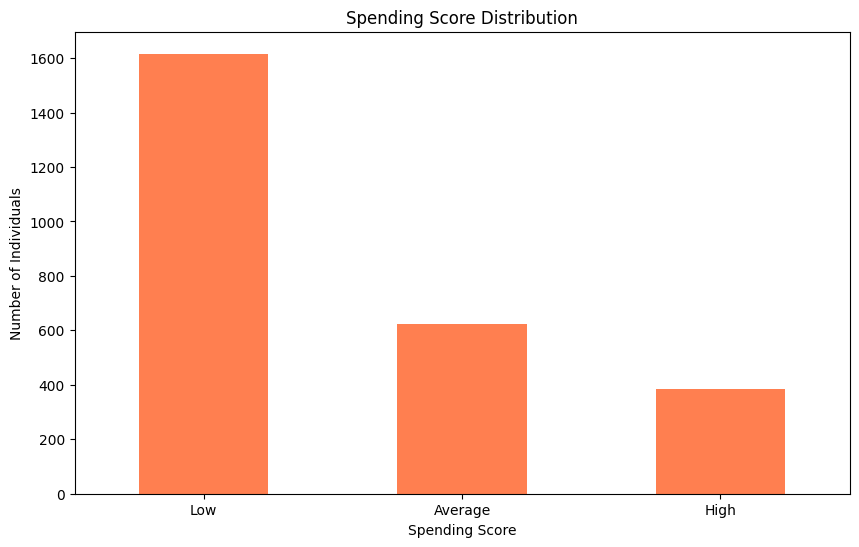

In [29]:
# Plot Spending Score Distribution
plt.figure(figsize=(10, 6))
spending_score_distribution.plot(kind='bar', color='coral')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.show()


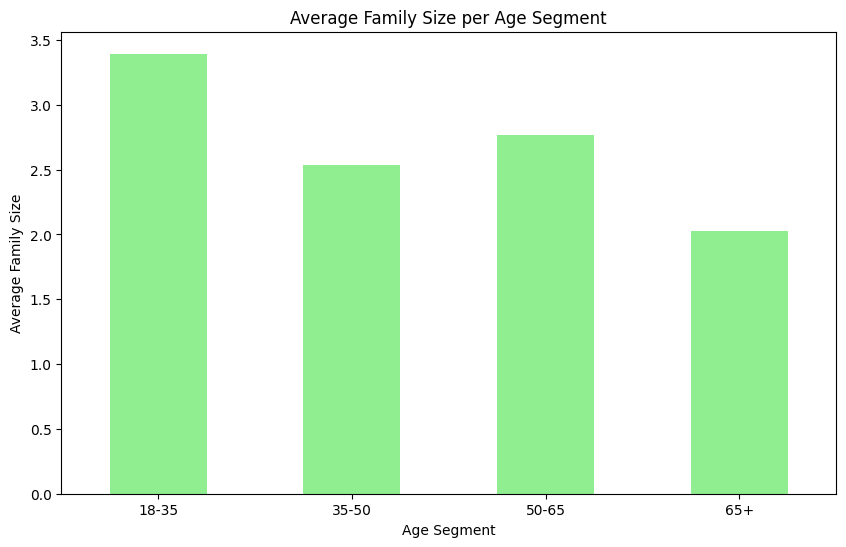

In [32]:
# Plot Average Family Size per Age Segment
plt.figure(figsize=(10, 6))
age_segment_insights.plot(kind='bar', color='lightgreen')
plt.title('Average Family Size per Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Average Family Size')
plt.xticks(rotation=0)
plt.show()


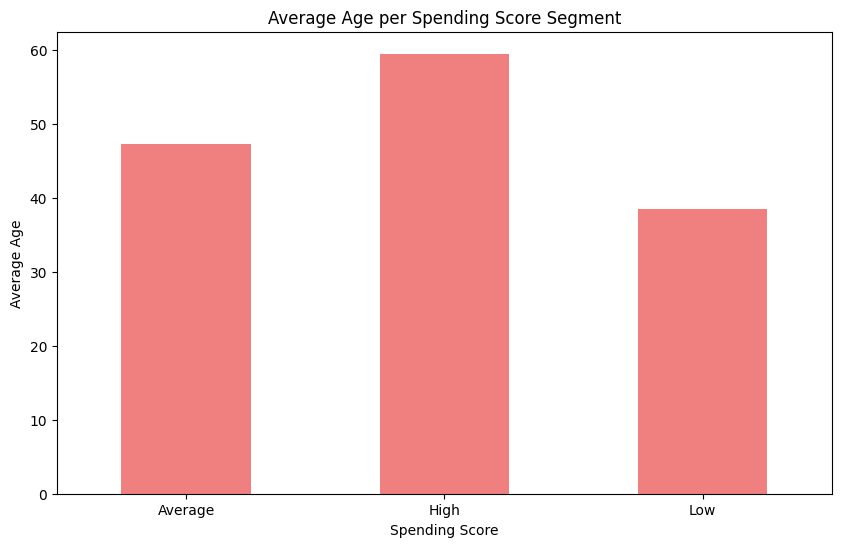

In [33]:
# Plot Average Age per Spending Score Segment
plt.figure(figsize=(10, 6))
spending_score_insights.plot(kind='bar', color='lightcoral')
plt.title('Average Age per Spending Score Segment')
plt.xlabel('Spending Score')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()


In [ ]:
'''Age Segment Distribution:

35-50: 940 individuals
18-35: 868 individuals
50-65: 457 individuals
65+: 362 individuals
<18: 0 individuals
Spending Score Distribution:

Low: 1616 individuals
Average: 625 individuals
High: 386 individuals
Age Segment Insights (Average Family Size):

<18: No data (no individuals in this segment)
18-35: Average family size is approximately 3.39
35-50: Average family size is approximately 2.54
50-65: Average family size is approximately 2.77
65+: Average family size is approximately 2.03
Spending Score Insights (Average Age):

Low: Average age is approximately 38.45
Average: Average age is approximately 47.31
High: Average age is approximately 59.49
Summary of Insights
Age Segmentation:

The largest age segment is 35-50, followed by 18-35.
There are no individuals under 18 in the dataset.
The average family size tends to be larger in the 18-35 segment compared to older segments.
Spending Score Segmentation:

Most individuals have a low spending score, followed by average and high spending scores.
Individuals with a high spending score tend to be older (average age of 59.49).
Individuals with a low spending score tend to be younger (average age of 38.45).'''